In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

 how to import sql data base in in our jupyter notebook and used for analysis

In [3]:
 con = sqlite3.connect(r'C:\Users\abhinav verma\Desktop\dataset/database.sqlite')

In [4]:
type(con)

sqlite3.Connection

In [5]:
df = pd.read_sql_query('select*from reviews', con)

In [6]:
df.shape

(568454, 10)

In [7]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [8]:
df.tail(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


Data Preprocessing

In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

 'HelpfulnessNumerator' is the number of people found the reviews useful
 
  'HelpfulnessDenominator' is the number of people given reviews

it should be always 'HelpfulnessNumerator' < = 'HelpfulnessDenominator'

In [10]:
df ['HelpfulnessDenominator'] < df['HelpfulnessNumerator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [11]:
df[df ['HelpfulnessDenominator'] < df['HelpfulnessNumerator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
df_valid =df[df ['HelpfulnessDenominator'] >= df['HelpfulnessNumerator']]

In [13]:
df_valid.shape

(568452, 10)

 so now two items are being removed from the datasets

now check for duplicate data

In [14]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

this is done as no  two people will have the same reviews at same time and same Text so remove that

In [15]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [16]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [17]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [18]:
data.shape

(393931, 10)

In [19]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [21]:
data['Time'] = pd.to_datetime(data['Time'] ,unit='s')

C:\Users\abhinav verma\AppData\Local\Temp\ipykernel_19564\2722071593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'] ,unit='s')


in above code we change time in date and second using pandas inbuilt function 

if warning occur to filter warning write this code

In [22]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

Analysis to what user amazon can recommend more product ?

amazon recommend product to those who buy more product and who has better conversion rate

so to analysis top customer we need summary ,text ,product purchase and score

In [23]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [24]:
data.groupby(['UserId']).agg({'Summary':'count' ,'Text' : 'count' ,'Score' :'mean' ,'ProductId' : 'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [25]:
recommend_data=data.groupby(['UserId']).agg({'Summary':'count' ,'Text' : 'count' ,'Score' :'mean' ,'ProductId' : 'count'}).sort_values(by='ProductId',ascending=False)

above we used to count text and summary and mean of score and total product purchase and sort it in desecending order

In [26]:
recommend_data

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [27]:
recommend_data.columns =['summary_count' , 'Text_count' , 'Avg_score' , 'no_of_product_purchase']

In [28]:
recommend_data

,summary_count,Text_count,Avg_score,no_of_product_purchase
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [29]:
recommend_data.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

here above we take the top 10 customer name

here below we take top 10 customer product purchase

In [30]:
recommend_data['no_of_product_purchase'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

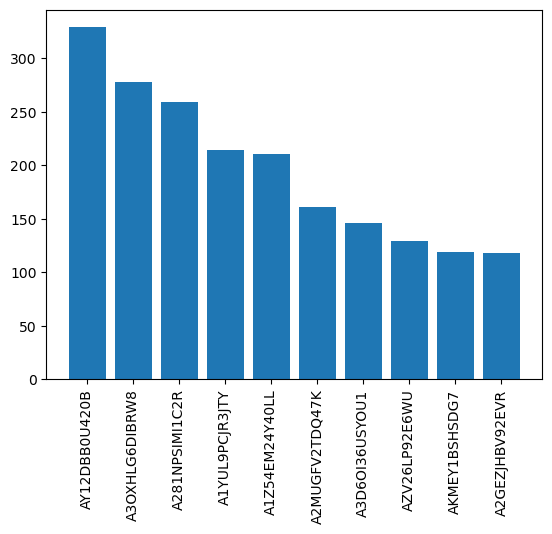

In [31]:
plt.bar(recommend_data.index[0:10],recommend_data['no_of_product_purchase'][0:10].values)
plt.xticks(rotation ='vertical')

know analysis which product has good number of reviews

here we have to find no of good reviews on most sold product with threshold value of 500

In [32]:
 data['ProductId'].value_counts().to_frame()

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [33]:
 product_data = data['ProductId'].value_counts().to_frame()

In [34]:
product_data['ProductId']>500

B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: ProductId, Length: 67624, dtype: bool

In [35]:
product_data[product_data['ProductId']>500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [36]:
product_data[product_data['ProductId']>500].index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

so this are my most frequent sold products

In [37]:
freq_product = product_data[product_data['ProductId']>500].index

In [38]:
freq_product

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [39]:
data['ProductId'].isin(freq_product)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [40]:
 freq_prod = data[data['ProductId'].isin(freq_product)]

In [41]:
freq_prod.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

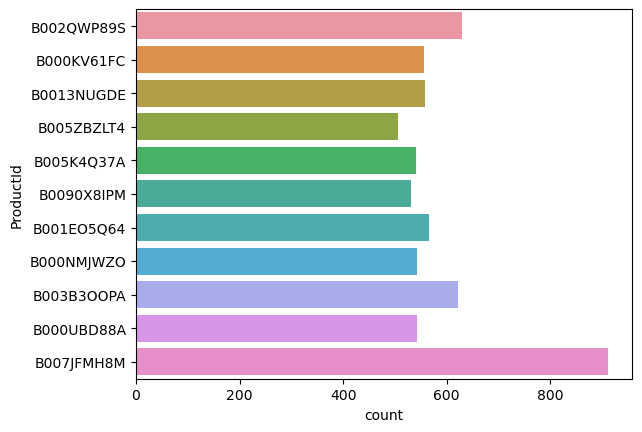

In [42]:
sns.countplot(y='ProductId' , data=freq_prod)

<Axes: xlabel='count', ylabel='ProductId'>

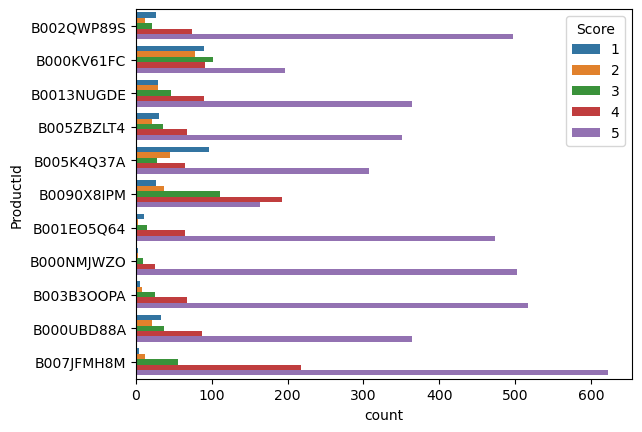

In [43]:
sns.countplot(y='ProductId' , data=freq_prod ,hue='Score')

so above we use seaborn library to counterplot dcore and max product purchase along with productIds

is ther any behaviour of frequent viewers and non frequent viewers in amazon

so here we have taken a customer who brought product from amazon atleast 50 times or more as frequent customers

so here we have to create a table for frequent and non frequent by using lambda function of python

In [44]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [45]:
data['UserId'].value_counts()

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [46]:
x=data['UserId'].value_counts()

In [47]:
data ['Viewer_type'] = data['UserId'].apply(lambda y: 'frequent' if x[y]>50 else 'Not_frequent')

In [48]:
freq_viewer = data[data ['Viewer_type']=='frequent']
Nonfreq_viewer = data[data ['Viewer_type']=='Not_frequent']

In [49]:
freq_viewer['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

<Axes: >

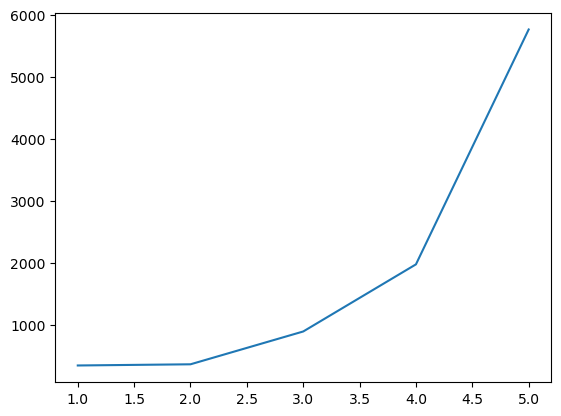

In [50]:
freq_viewer['Score'].value_counts().plot()

<Axes: >

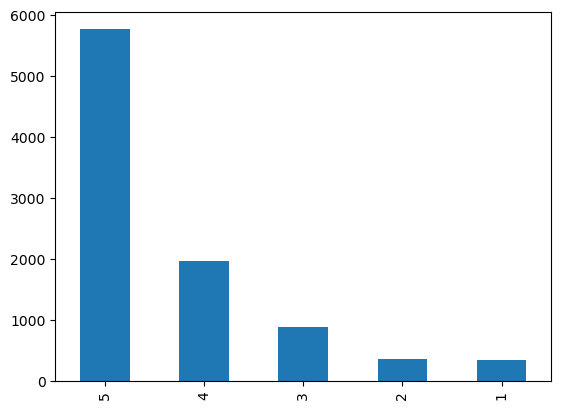

In [51]:
freq_viewer['Score'].value_counts().plot(kind="bar")

In [52]:
freq_viewer['Score'].value_counts()/len(freq_viewer)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

In [53]:
freq_viewer['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

In [54]:
Nonfreq_viewer['Score'].value_counts()

5    245196
4     54114
1     35957
3     28872
2     20434
Name: Score, dtype: int64

In [55]:
Nonfreq_viewer['Score'].value_counts()/len(Nonfreq_viewer)*100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

<Axes: >

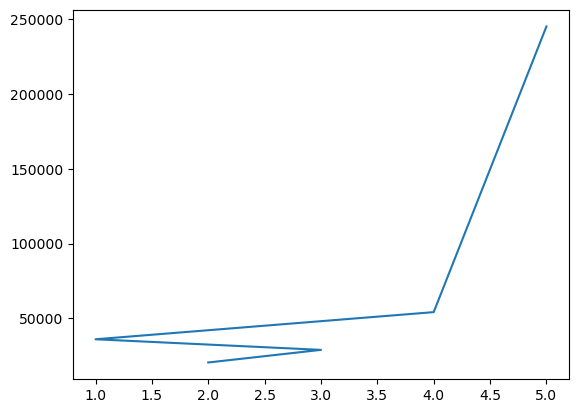

In [56]:
Nonfreq_viewer['Score'].value_counts().plot()

<Axes: >

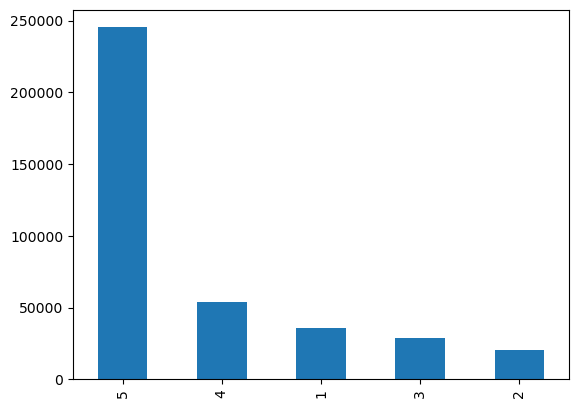

In [57]:
Nonfreq_viewer['Score'].value_counts().plot(kind='bar')

does frequent viewer post a lot or speak alot about product(verbose)

so here we calculate text length of each reviews and plot boxplot

so here basically we transfering each seperated text to list and find length

In [60]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Viewer_type'],
      dtype='object')

In [64]:
def text_length(text):
    return len(text.split(' '))

In [65]:
data['Text'].apply(text_length)

0         49
1         31
2         99
3         43
4         30
          ..
568449    26
568450    46
568451    71
568452    37
568453    21
Name: Text, Length: 393931, dtype: int64

In [66]:
data['Text_length'] = data['Text'].apply(text_length)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not_frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not_frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not_frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not_frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not_frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not_frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not_frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not_frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not_frequent,37


In [71]:
freq_viewerdata = data[data ['Viewer_type']=='frequent']
Nonfreq_viewerdata = data[data ['Viewer_type']=='Not_frequent']

now plot a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x24b2510c8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24b2510da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b24d97fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x24b2510ebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b234df3d0>],
 'means': []}

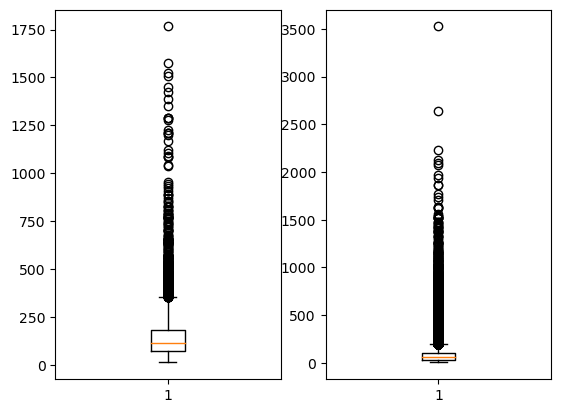

In [75]:
fig = plt.figure()
ax1=fig.add_subplot(121)
ax1.boxplot(freq_viewerdata['Text_length'])

ax2=fig.add_subplot(122)
ax2.boxplot(Nonfreq_viewerdata['Text_length'])

so to make it more fancy and remove outliers set y linit from 0 to 800

(0.0, 800.0)

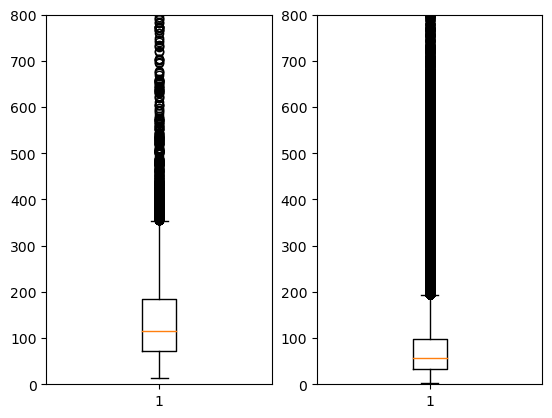

In [77]:
fig = plt.figure()
ax1=fig.add_subplot(121)
ax1.boxplot(freq_viewerdata['Text_length'])
ax1.set_ylim(0,800)
ax2=fig.add_subplot(122)
ax2.boxplot(Nonfreq_viewerdata['Text_length'])
ax2.set_ylim(0,800)

now perform sentiment analysis

so in sentiment analysis we do have a polarity related to feeling of customer which lies between (-1 to 1) where (-1) has -ve and 1 has +ve feedback about the product, so to do this we have to install textblob, which used to give the sentiment polarity based on text 

In [78]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     --------- ---------------------------- 163.8/636.8 kB 4.8 MB/s eta 0:00:01
     ------------------------------- ------ 522.2/636.8 kB 6.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [83]:
from textblob import TextBlob

In [80]:
data['Summary'][0]

'Good Quality Dog Food'

In [86]:
TextBlob(data['Summary'][0]).sentiment.polarity

0.7

so here is huge data and we cant do this in all data so we made sample of the data

In [87]:
sample =data[0 : 50000]

In [88]:
polarity=[]
for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [89]:
len(polarity)

50000

In [91]:
sample['polarity'] = polarity

In [92]:
sample.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not_frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not_frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not_frequent,99,0.0


so to get the keywords used in +ve or-ve polarity we use counter from collection

In [93]:
positive_pol = sample[sample['polarity'] > 0]
negative_pol = sample[sample['polarity'] < 0]

In [96]:
from collections import Counter

In [97]:
Counter(negative_pol['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

negative word used in the review for some product and service

In [98]:
Counter(positive_pol['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

postive word used in the review for some product and service